In [1]:
#Analysis of features (measurement of cell nuclei) to predict whether the breast cancer tissue is malignant(M) or benign(B)

#Importing all libraries for data analysis and machine learning
import numpy as np #math
import pandas as pd #processing and manipulating data
import matplotlib.pyplot as plt #plotting the data (graph)
import seaborn as sns #plot data (interactive graph)
%matplotlib inline

from sklearn.model_selection import train_test_split # split data into train and test sets
from sklearn.linear_model import LogisticRegression # Logistic regression
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.neighbors import KNeighborsClassifier #K-Neighbors classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree classifier
from sklearn.svm import SVC # Support Vector Machines classifier
from sklearn import metrics # to check for error and accuracy of the model


In [2]:
#Import the dataset
#Dataset is publically available and is downloaded from the UCI Machine Learning Repository

data = pd.read_csv("breastcancer_diagnostic/data.csv", header = 0)

In [3]:
#Data Exploration

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
#Dropping 'Unnamed' and 'id' columns 

data = data.drop("Unnamed: 32", axis=1)
data = data.drop("id", axis=1)


In [6]:
#Descriptive Statistics

data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
#Independent variables
x = data.iloc[:, 2:31].values
#Dependent variables
y= data['diagnosis'].values

In [8]:
#The variable, 'diagnosis' is a class label, so convert it to integer

#data_diagnosis =data['diagnosis'].map({'M':1,'B':0})
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)


Number of Benign:  357
Number of Malignant :  212


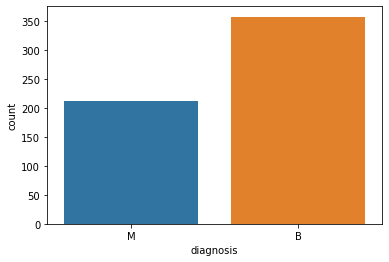

In [9]:
#Determining total number of malignant and benign cells

ct = sns.countplot(data['diagnosis'], label = "Count")
B, M = data['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

diagnosis
B    [[AxesSubplot(0.125,0.779333;0.125x0.100667), ...
M    [[AxesSubplot(0.125,0.779333;0.125x0.100667), ...
dtype: object

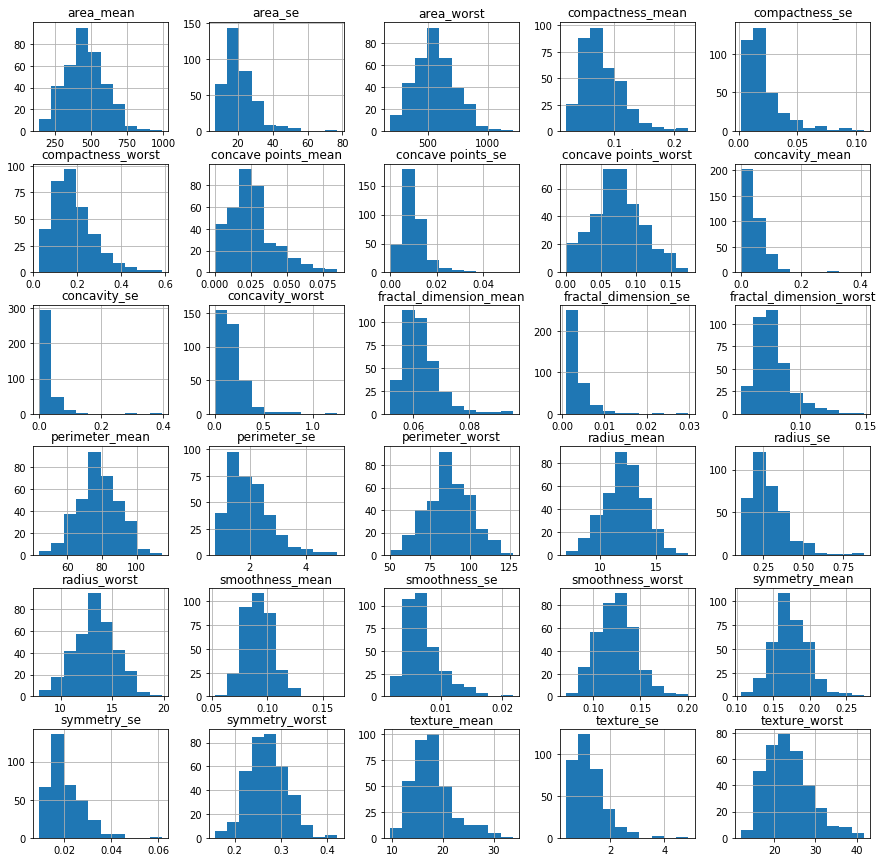

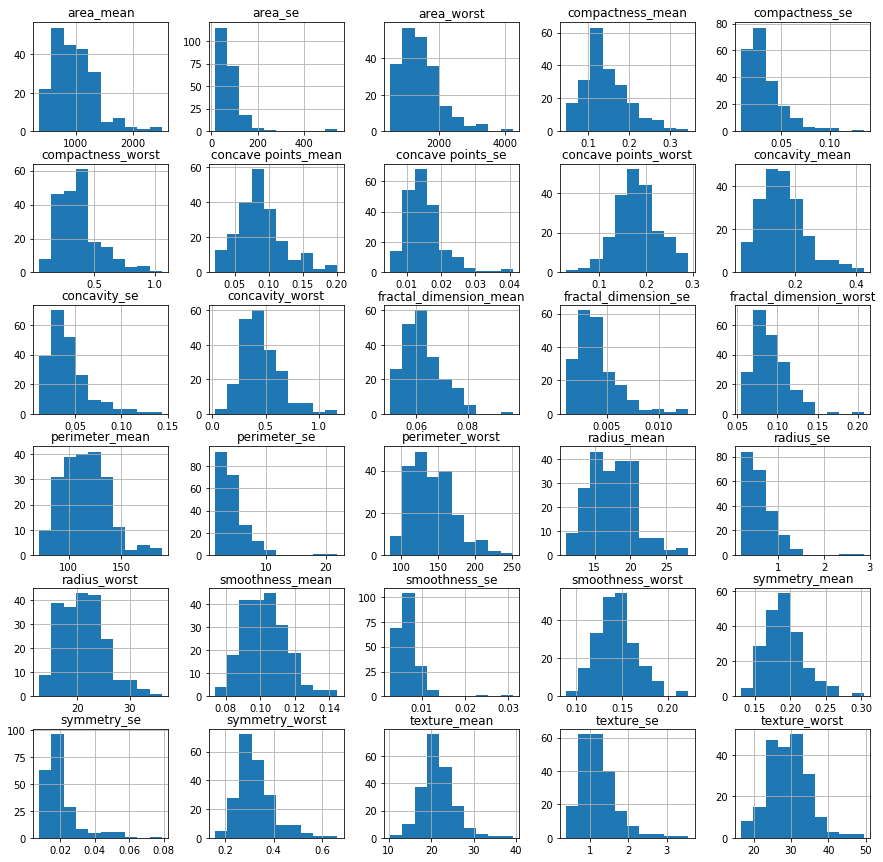

In [10]:
#Visualization of the dataset
#Data distribution of the different features 

data.groupby('diagnosis').size()
data.groupby('diagnosis').hist(figsize=(15, 15))

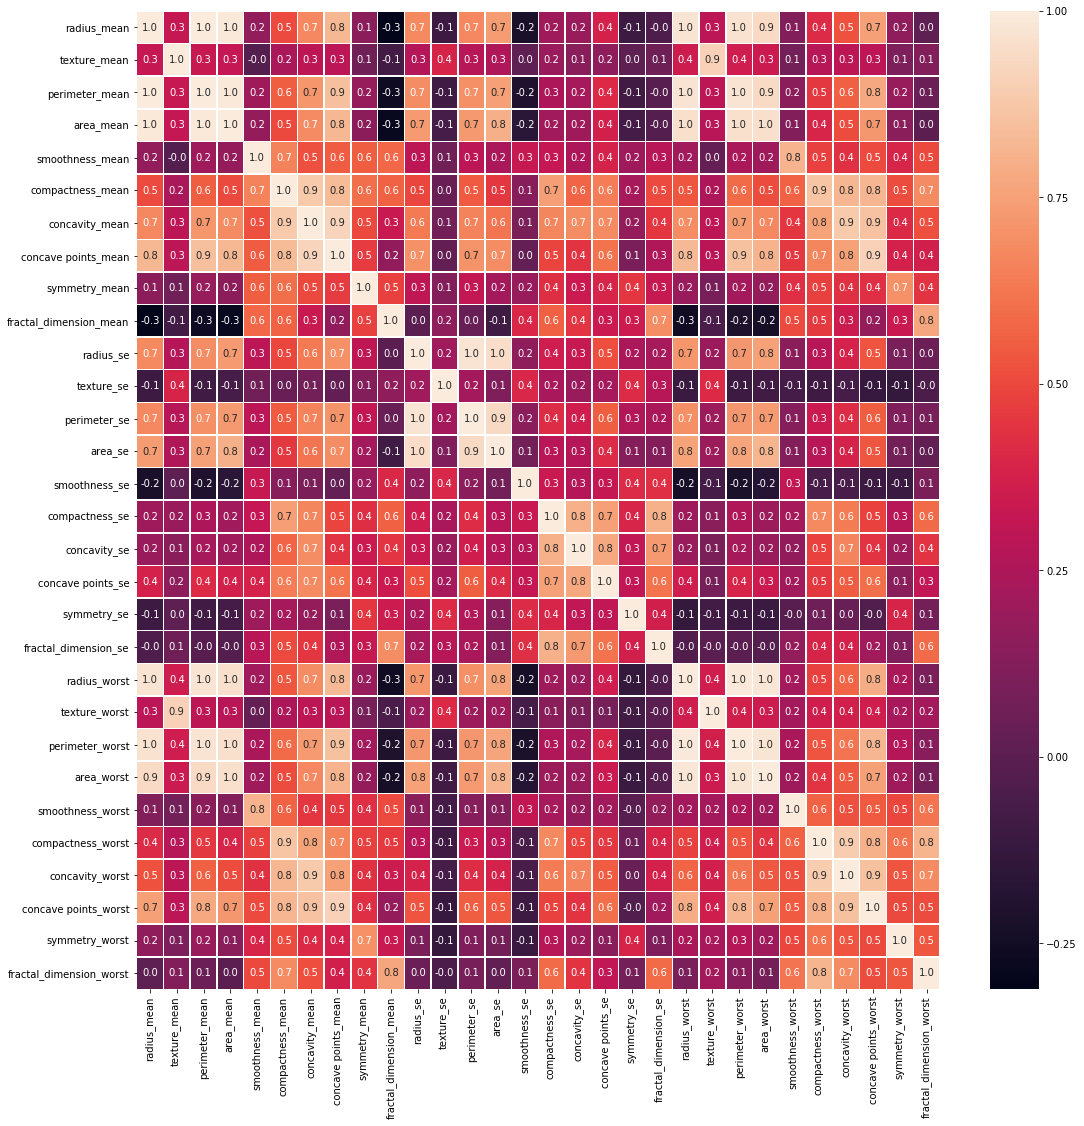

In [11]:
#Correlation - exploring the relationship between the features 

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [12]:
#Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
#Create Function to fit and predict model

def fitPredictModel(model):
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    print(metrics.accuracy_score(prediction,Y_test))
    
    #Generate the confusion matrix and prediction accuracy
    cm = metrics.confusion_matrix(Y_test,prediction)
    
    #Visualize the confusion matrix
    #sns.heatmap(cm,annot=True,fmt="d")
    

In [15]:
#Support Vector Machines Classifier

SVC_model = SVC(kernel = 'rbf', random_state = 0)
fitPredictModel(SVC_model)


0.9766081871345029


In [16]:
#Random Forest Classifier

RF_model=RandomForestClassifier(n_estimators=100)
fitPredictModel(RF_model)

0.9649122807017544


In [17]:
#Logistic Regression Classifier

LR_model = LogisticRegression(random_state = 0)
fitPredictModel(LR_model)

0.9766081871345029


C:\Users\ran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
#K-Nearest Neighbors Classifier

KNN_classifier = KNeighborsClassifier(n_neighbors = 10)
fitPredictModel(KNN_classifier)

0.9590643274853801


In [19]:
#Using ANN (Artificial Neural Network) to predict Heart Disease or not

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [20]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 100)

Epoch 1/100
398/398 [==============================] - 2s 5ms/step - loss: 0.6898 - accuracy: 0.6533
Epoch 2/100
398/398 [==============================] - 0s 216us/step - loss: 0.6613 - accuracy: 0.8970
Epoch 3/100
398/398 [==============================] - 0s 216us/step - loss: 0.5524 - accuracy: 0.9523
Epoch 4/100
398/398 [==============================] - 0s 224us/step - loss: 0.3792 - accuracy: 0.9623
Epoch 5/100
398/398 [==============================] - 0s 226us/step - loss: 0.2392 - accuracy: 0.9623
Epoch 6/100
398/398 [==============================] - 0s 226us/step - loss: 0.1635 - accuracy: 0.9698
Epoch 7/100
398/398 [==============================] - 0s 229us/step - loss: 0.1268 - accuracy: 0.9774
Epoch 8/100
398/398 [==============================] - 0s 236us/step - loss: 0.1070 - accuracy: 0.9774
Epoch 9/100
398/398 [==============================] - 0s 229us/step - loss: 0.0957 - accuracy: 0.9774
Epoch 10/100
398/398 [==============================] - 0s 224us/step - los

0.9532163742690059


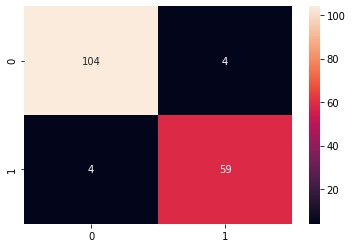

In [21]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
cm = metrics.confusion_matrix(Y_test, y_pred)
print(metrics.accuracy_score(y_pred,Y_test))

#Visualize the confusion matrix
sns.heatmap(cm,annot=True,fmt="d")